<h1>Importar librerias</h1>

In [1]:
from sklearn.tree import plot_tree
import numpy as np  
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder   #Transformar en un array las varibles object
from sklearn.model_selection import train_test_split  #dividir el data_set en data_train y data_test 
from sklearn.tree import DecisionTreeClassifier   #generar arboles de decision
from sklearn.linear_model import LogisticRegression   #generar la regresion logistica
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.metrics import f1_score #metrica de evaluacion
from sklearn.model_selection import RandomizedSearchCV  #probar con distintas caracteristicas y ver la mejor
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier ## random Forest
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

<h1> Abrir datos y analizar datos </h1>

In [2]:
#Guardamos en una variable el df 
df=pd.read_csv('banana_quality.csv')
pd.set_option('display.max_columns', None)
df.head()

Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

  Quality  
0    Good  
1    Good  
2    Good  
3    Good  
4    Good

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [4]:
df.isna().any()

Size           False
Weight         False
Sweetness      False
Softness       False
HarvestTime    False
Ripeness       False
Acidity        False
Quality        False
dtype: bool

In [5]:
print('numero de caracteristicas:', len(df.columns))
print('numero de datos:', len(df))

numero de caracteristicas: 8
numero de datos: 8000


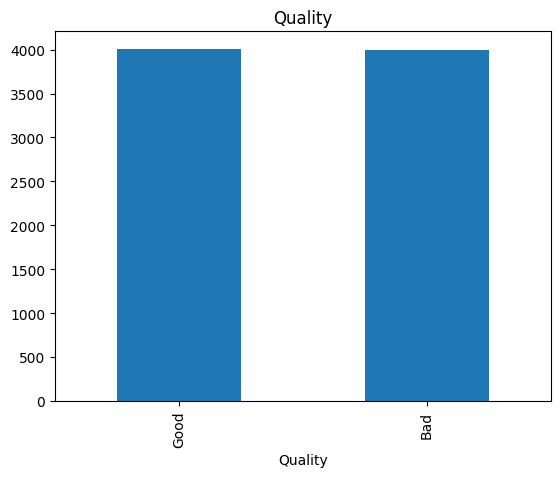

In [6]:
#Revisamos si hay una diferencia de clase en la variable default payment next month
df['Quality'].value_counts().plot(kind="bar")
plt.title("Quality")
plt.show()

In [7]:
#información datos numericos (en caso de ser necesario se deben normalizar o estandarizar los datos, dependiendo del algoritmo a usar y la diferencia que exista entre ellos)
df.describe()

Size       Weight    Sweetness     Softness  HarvestTime  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean     -0.747802    -0.761019    -0.770224    -0.014441    -0.751288   
std       2.136023     2.015934     1.948455     2.065216     1.996661   
min      -7.998074    -8.283002    -6.434022    -6.959320    -7.570008   
25%      -2.277651    -2.223574    -2.107329    -1.590458    -2.120659   
50%      -0.897514    -0.868659    -1.020673     0.202644    -0.934192   
75%       0.654216     0.775491     0.311048     1.547120     0.507326   
max       7.970800     5.679692     7.539374     8.241555     6.293280   

          Ripeness      Acidity  
count  8000.000000  8000.000000  
mean      0.781098     0.008725  
std       2.114289     2.293467  
min      -7.423155    -8.226977  
25%      -0.574226    -1.629450  
50%       0.964952     0.098735  
75%       2.261650     1.682063  
max       7.249034     7.411633

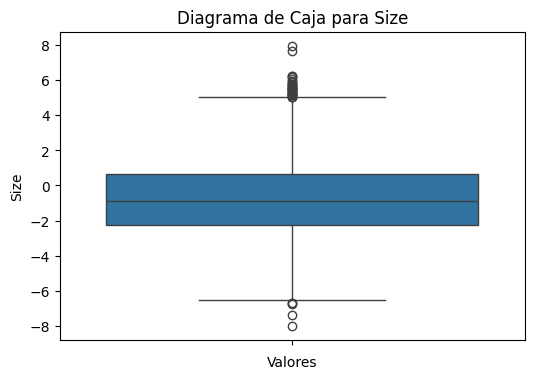

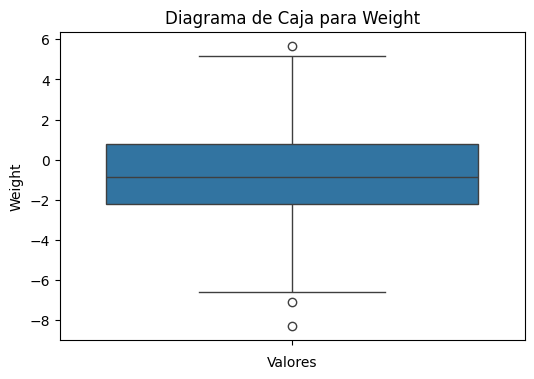

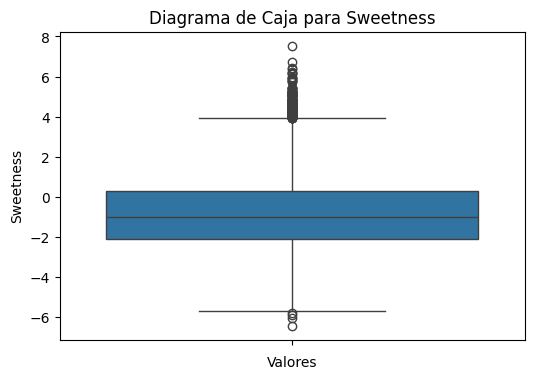

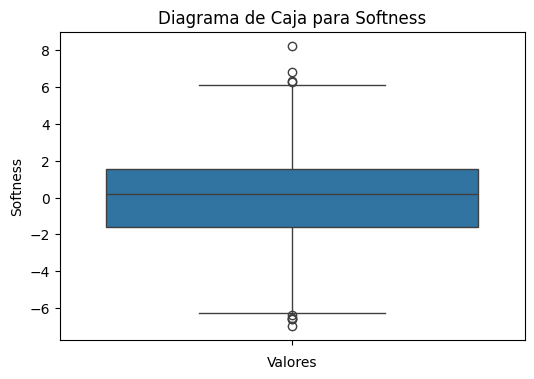

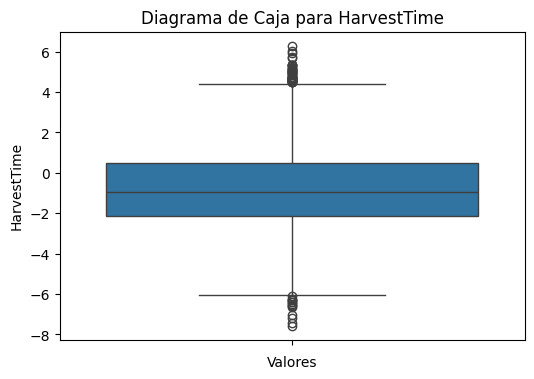

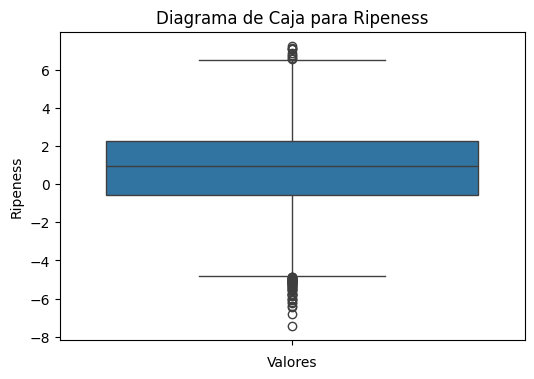

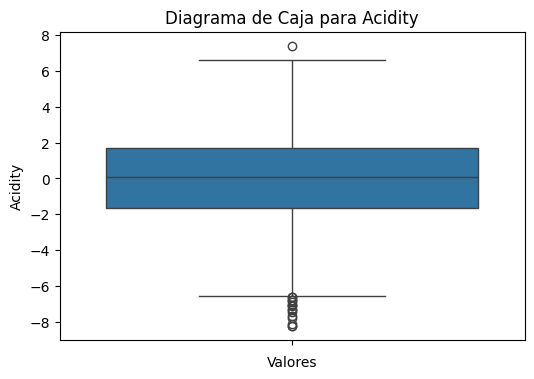

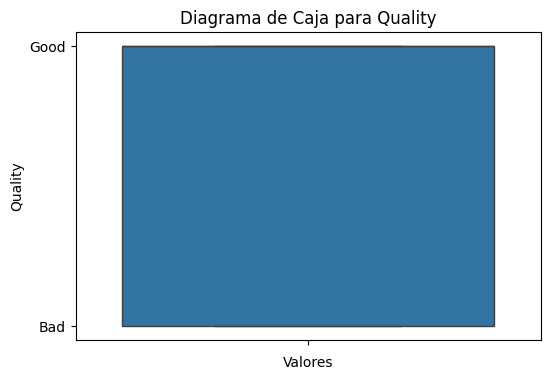

In [8]:
#Revisaremos con diagramas de caja los valoress de cada categoría, con el objetivo de ver si existen valores atipicos
for column in df.columns:
    plt.figure(figsize=(6, 4))  # Tamaño de la figura
    sns.boxplot(data=df[column])  # Graficar diagrama de caja
    plt.title(f'Diagrama de Caja para {column}')  # Título del gráfico
    plt.xlabel('Valores')  # Etiqueta del eje x
    plt.ylabel(column)  # Etiqueta del eje y
    plt.show()  # Mostrar el gráfico

In [10]:
#Copiamos la base de datos y eliminamos la columna ID ya que no aporta
df_c=df.copy()
df_c.head()

Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

  Quality  
0    Good  
1    Good  
2    Good  
3    Good  
4    Good

In [13]:
df_c['Quality'] = df_c['Quality'].replace({'Good': 1, 'Bad': 0})
df_c.head()

C:\Users\sebas\AppData\Local\Temp\ipykernel_16760\2651396974.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_c['Quality'] = df_c['Quality'].replace({'Good': 1, 'Bad': 0})


Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

   Quality  
0        1  
1        1  
2        1  
3        1  
4        1

In [14]:
#revisamos las correlaciones entre todas las variables y la variable dependiente
matrix_corr=df_c.corr()
matrix_corr['Quality'].sort_values(ascending=False)

Quality        1.000000
Weight         0.388789
Sweetness      0.377220
HarvestTime    0.376600
Size           0.352983
Ripeness       0.350503
Acidity       -0.000860
Softness      -0.001637
Name: Quality, dtype: float64

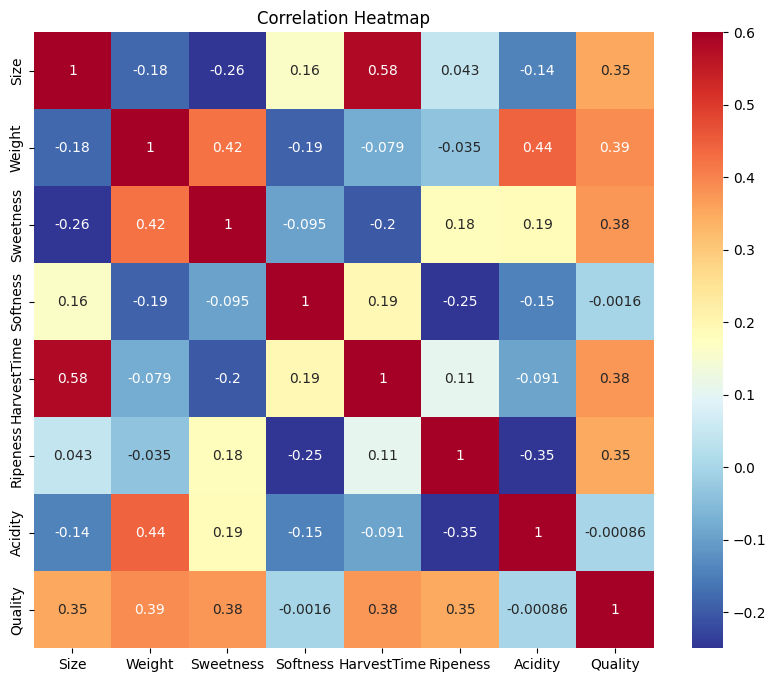

In [15]:
# Correlation Heatmap (Numerical Columns)
plt.figure(figsize=(10,8))
corr = matrix_corr
sns.heatmap(corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

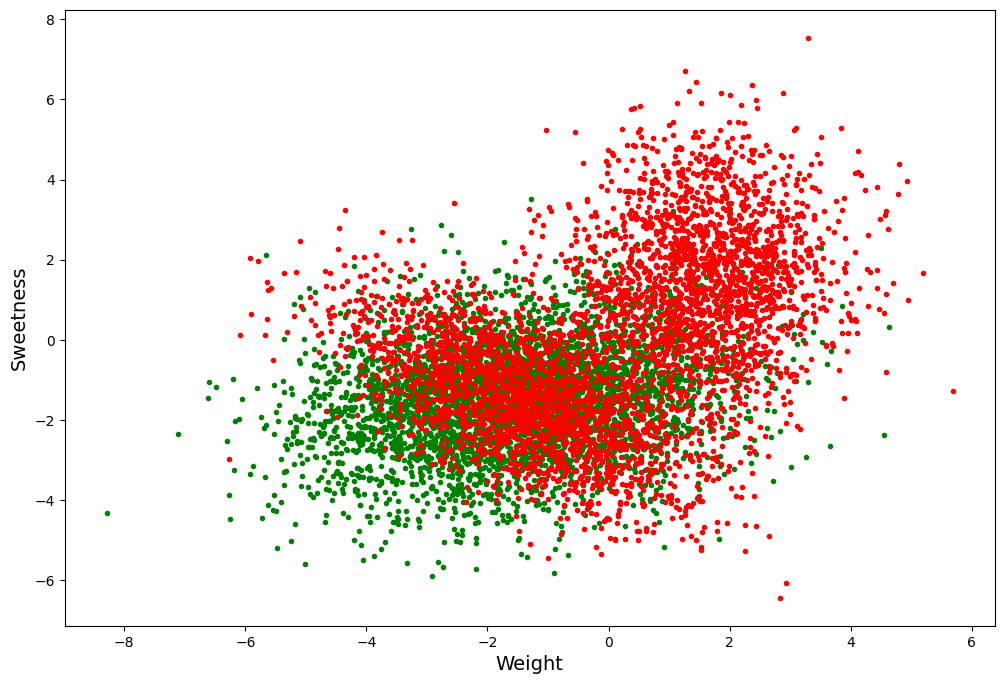

In [16]:
# Representación gráfica de dos características
plt.figure(figsize=(12, 8))
plt.scatter(df_c["Weight"][df_c['Quality'] == 0], df_c["Sweetness"][df_c['Quality'] == 0], c="g", marker=".")
plt.scatter(df_c["Weight"][df_c['Quality'] == 1], df_c["Sweetness"][df_c['Quality'] == 1], c="r", marker=".")
plt.xlabel("Weight", fontsize=14)
plt.ylabel("Sweetness", fontsize=14)
plt.show()

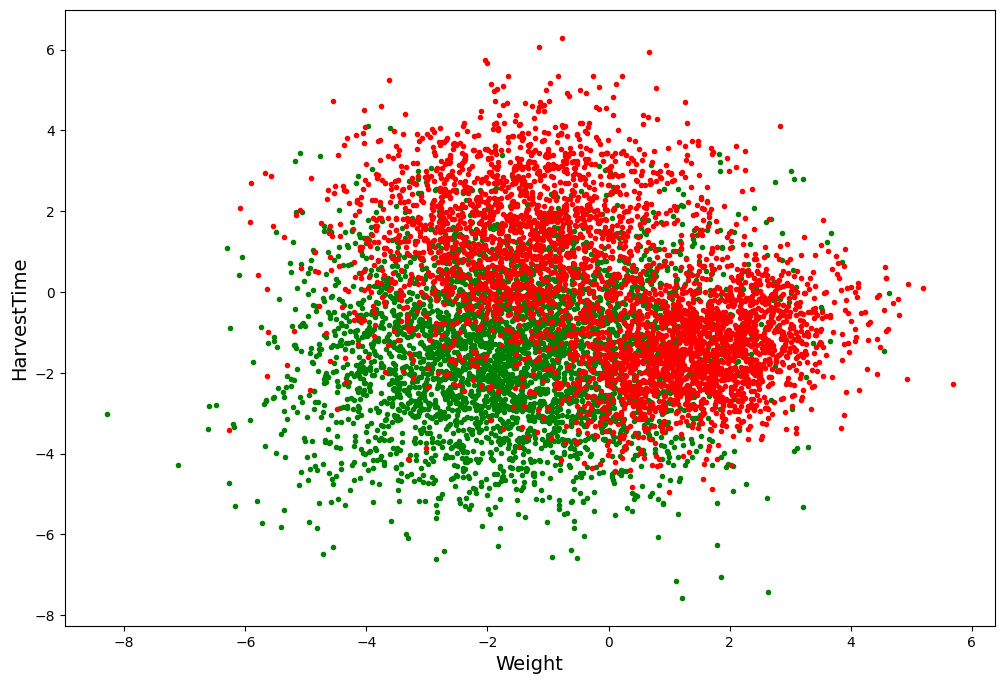

In [19]:
# Representación gráfica de dos características
plt.figure(figsize=(12, 8))
plt.scatter(df_c["Weight"][df_c['Quality'] == 0], df_c["HarvestTime"][df_c['Quality'] == 0], c="g", marker=".")
plt.scatter(df_c["Weight"][df_c['Quality'] == 1], df_c["HarvestTime"][df_c['Quality'] == 1], c="r", marker=".")
plt.xlabel("Weight", fontsize=14)
plt.ylabel("HarvestTime", fontsize=14)
plt.show()

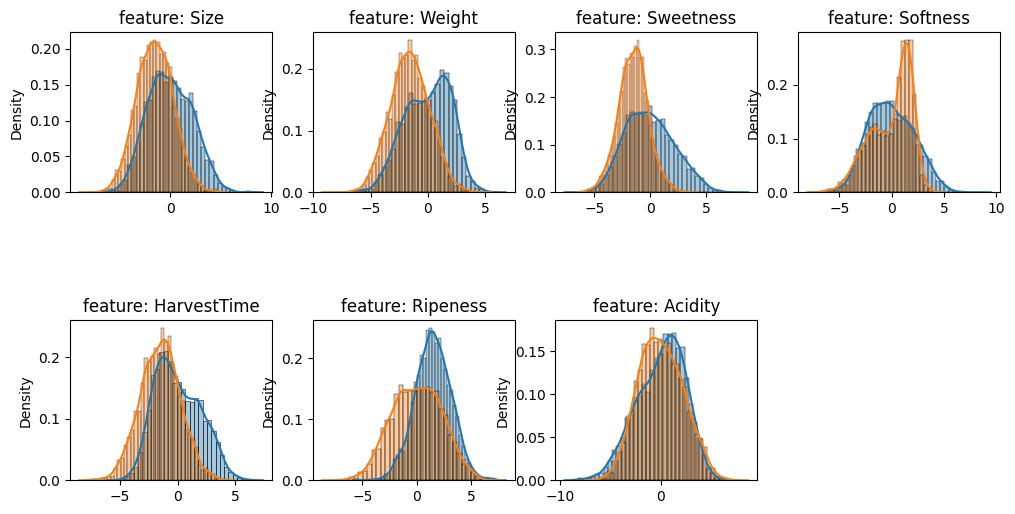

In [20]:
# Representamos gráficamente las características diferenciando entre 0 y 1 la variable dependiente
features = df_c.drop("Quality", axis=1)

plt.figure(figsize=(12,32))
gs = gridspec.GridSpec(9, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(df_c[f][df_c["Quality"] == 1], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4)
    sns.histplot(df_c[f][df_c["Quality"] == 0], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(f))

plt.show()

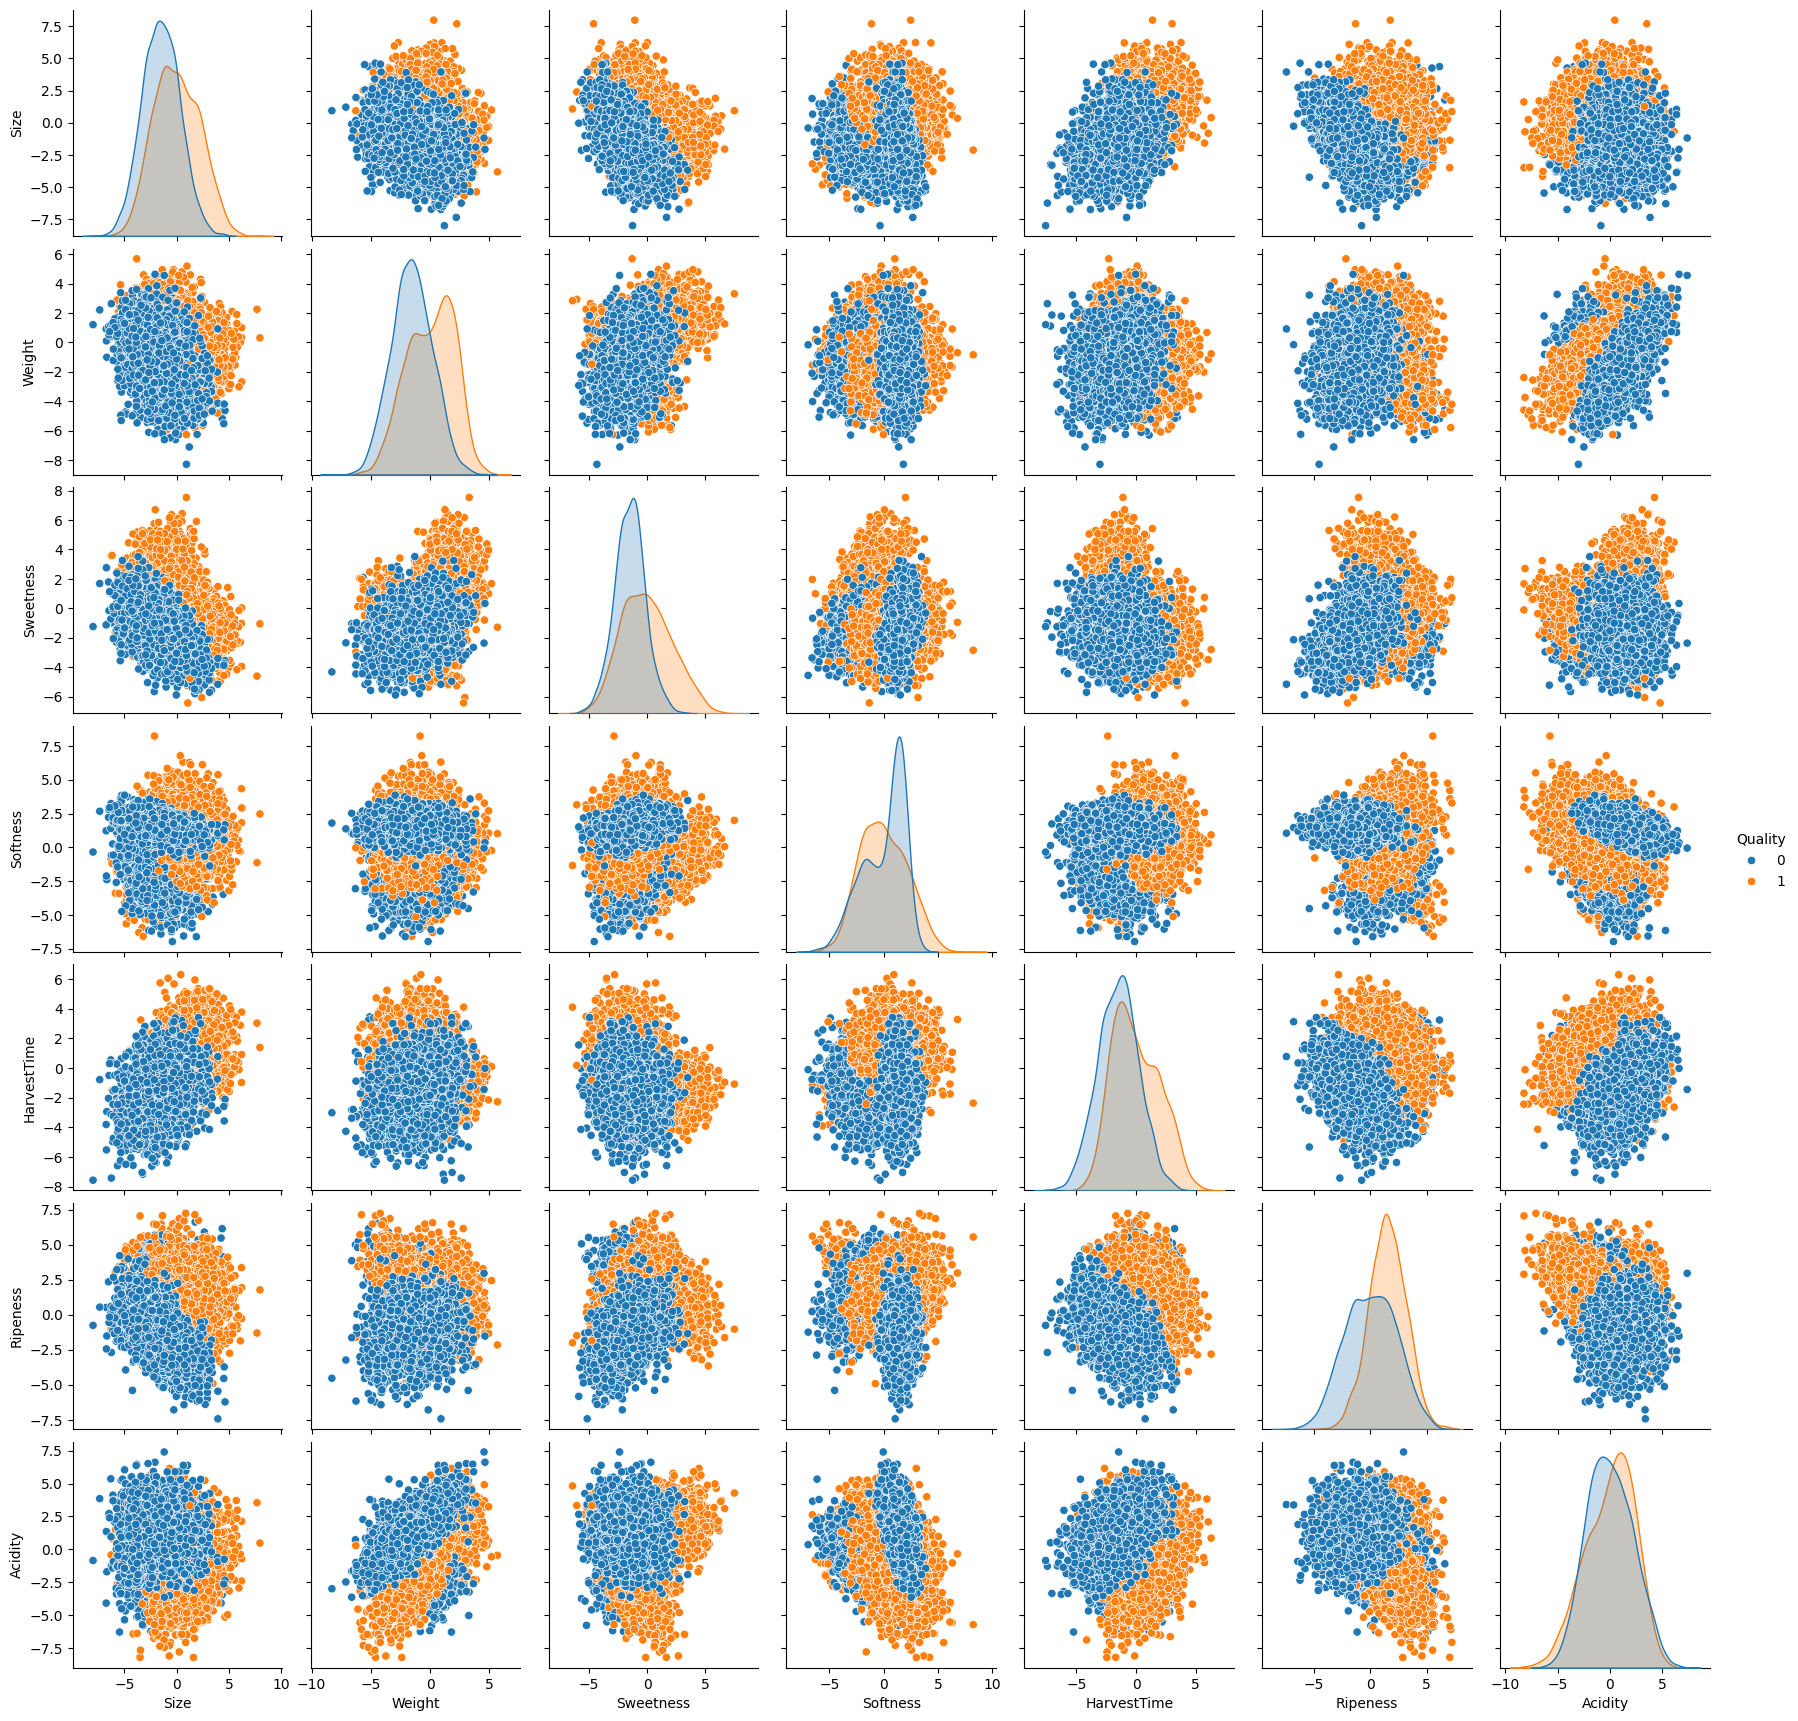

In [22]:
sns.pairplot(df_c, hue='Quality');

<h2>Preparación de datos</h2>

<h3>Arbol de decision</h3>

In [23]:
train_set_tree, test_set_tree = train_test_split(df_c, test_size=0.2, random_state=42, stratify=df_c["Quality"])


In [24]:
#separacion de variables X e Y
#entrenamiento
X_train_tree = train_set_tree.drop("Quality", axis=1)
y_train_tree = train_set_tree["Quality"].copy()
#test
X_test_tree = test_set_tree.drop("Quality", axis=1)
y_test_tree = test_set_tree["Quality"].copy()

<h3>Random forest</h3>

In [27]:
train_set_rf, test_set_rf = train_test_split(df_c, test_size=0.2, random_state=42, stratify=df_c["Quality"])

In [28]:
#separacion de variables X e Y
#entrenamiento
X_train_rf = train_set_rf.drop("Quality", axis=1)
y_train_rf = train_set_rf["Quality"].copy()
#test
X_test_rf = test_set_rf.drop("Quality", axis=1)
y_test_rf = test_set_rf["Quality"].copy()

<h2>Modelos de decision</h2>

<h3>Arbol de decision</h3>

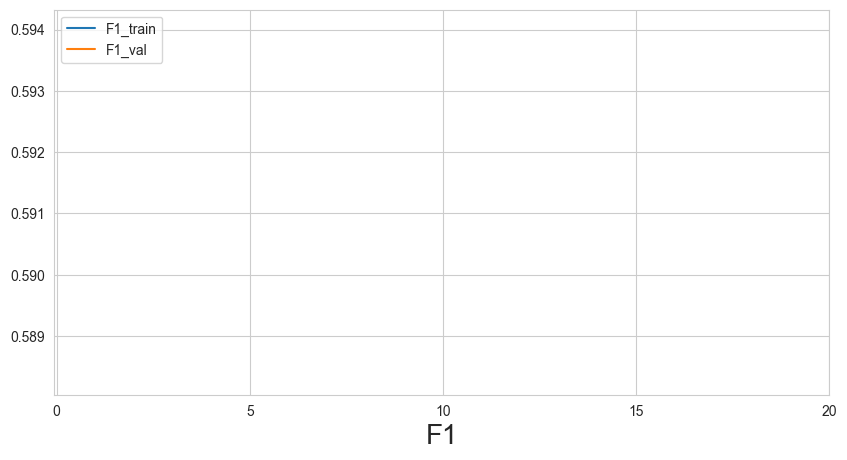

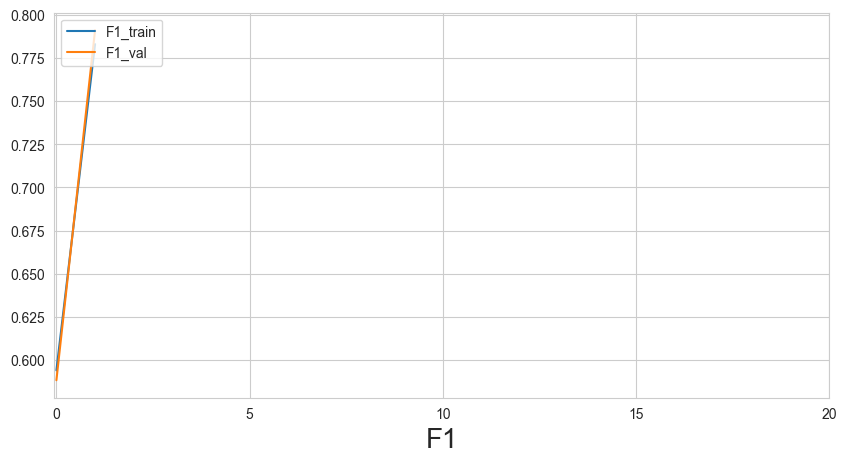

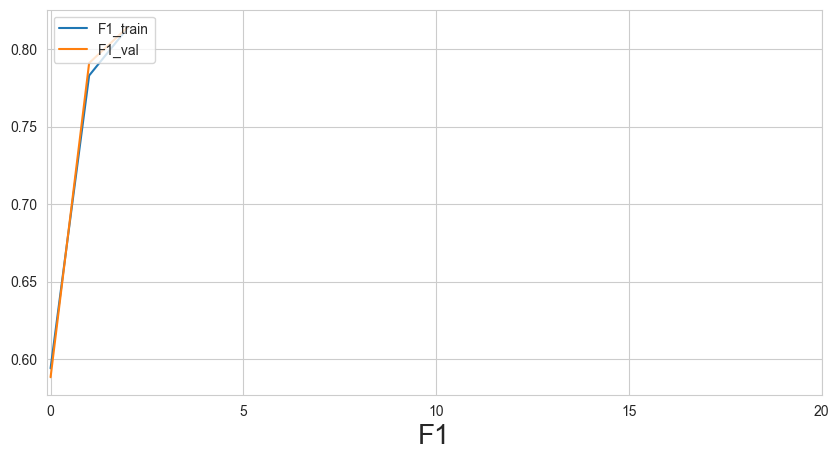

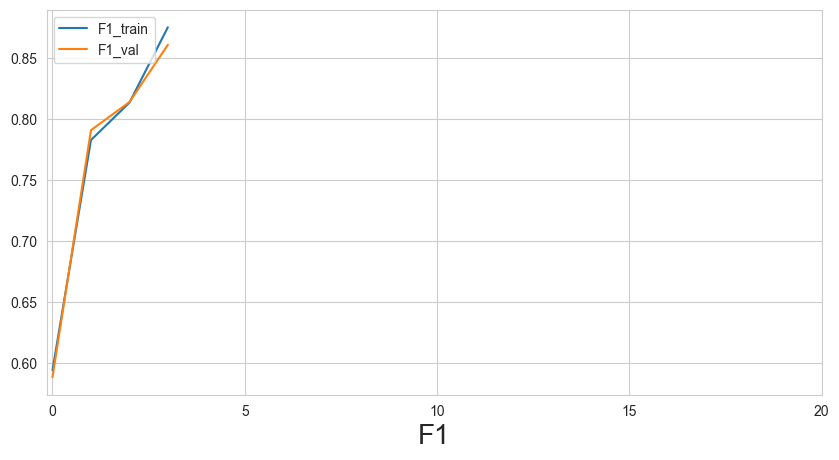

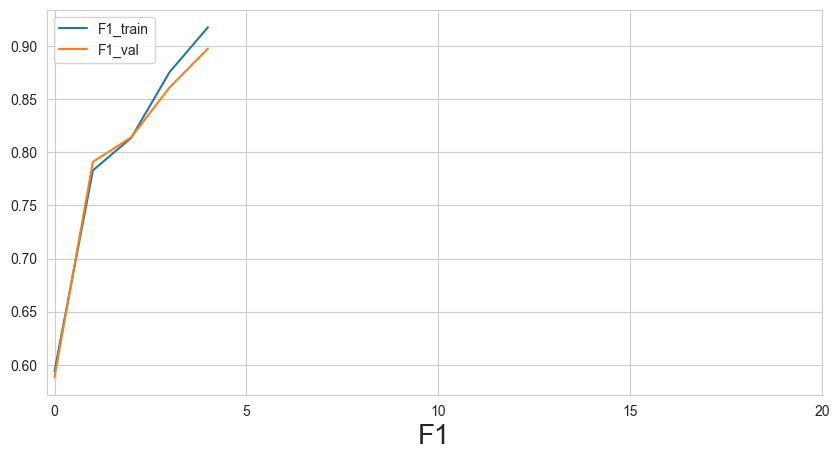

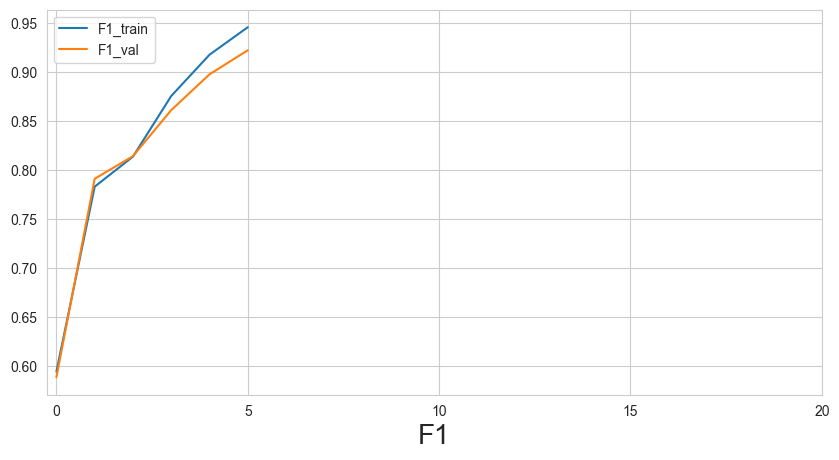

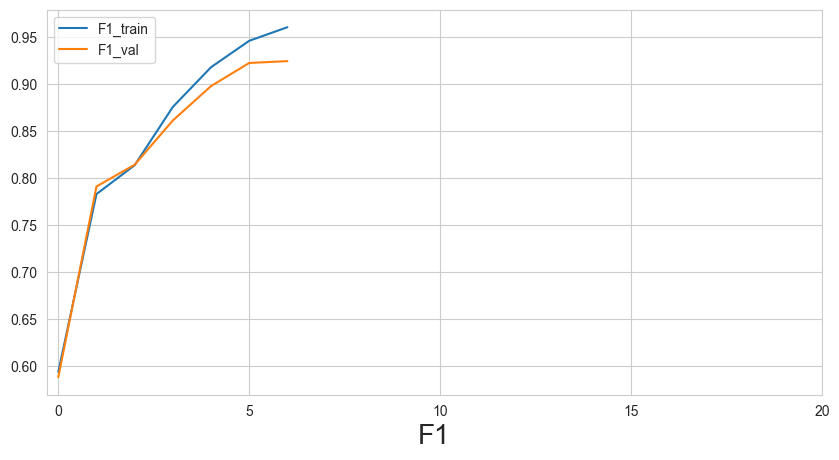

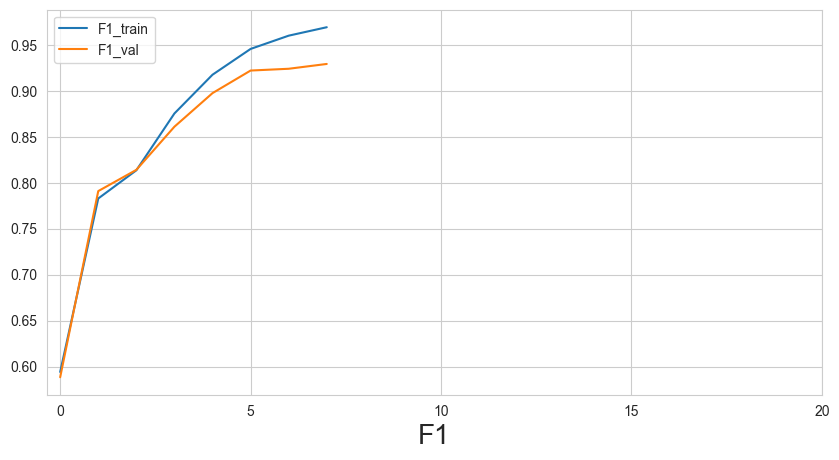

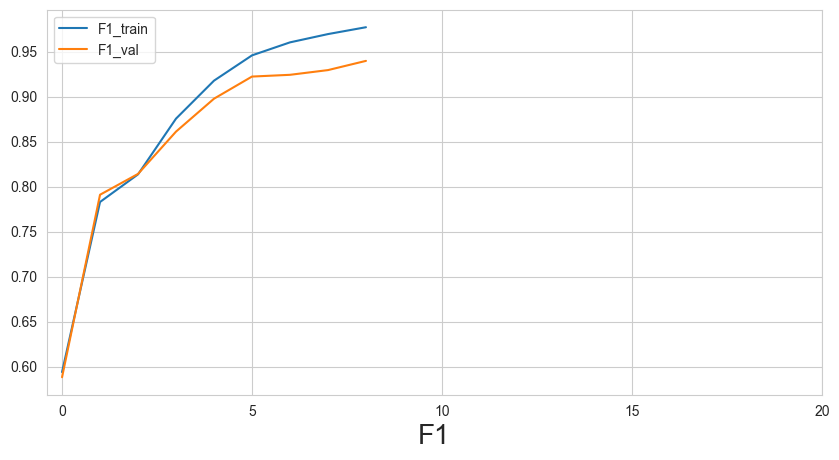

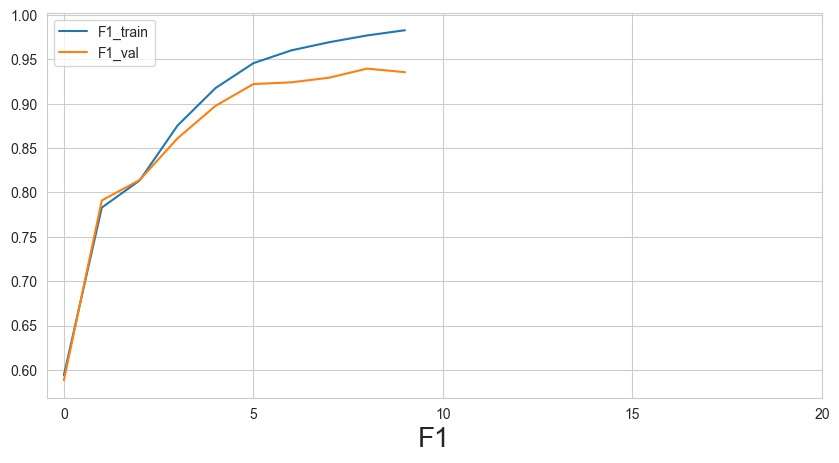

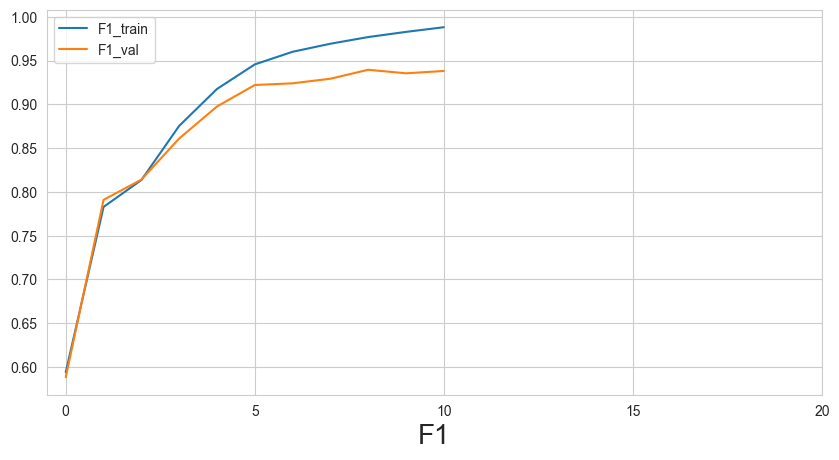

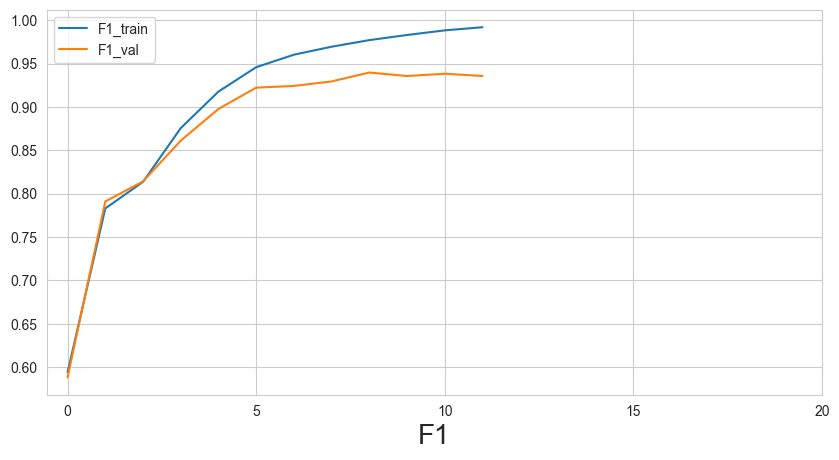

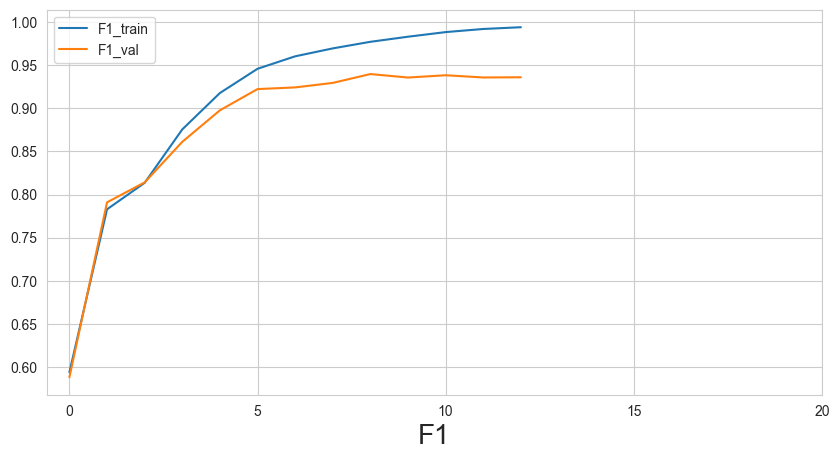

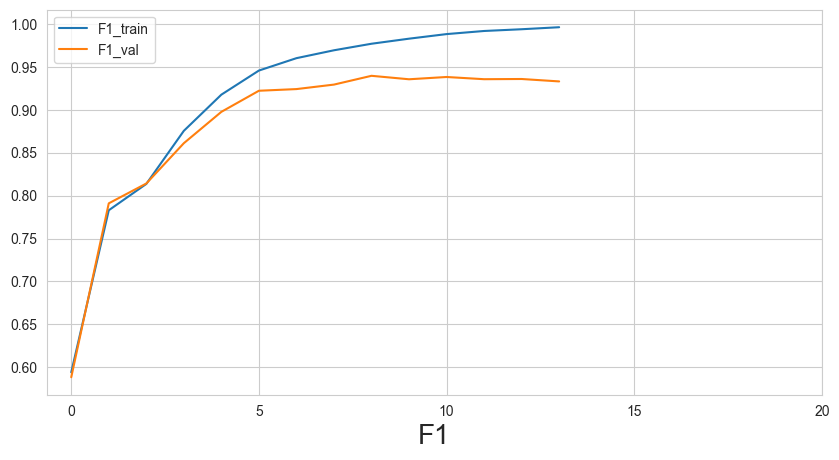

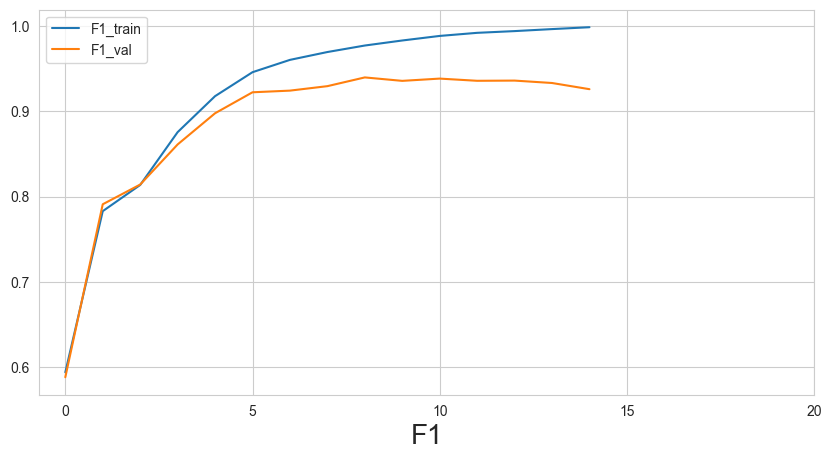

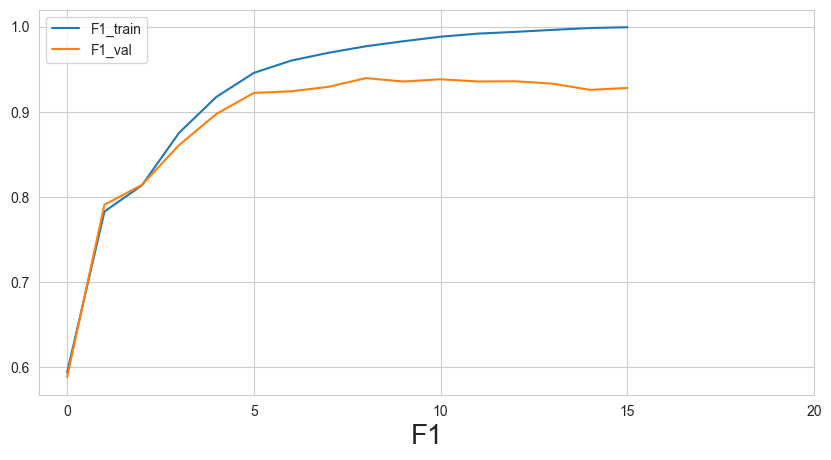

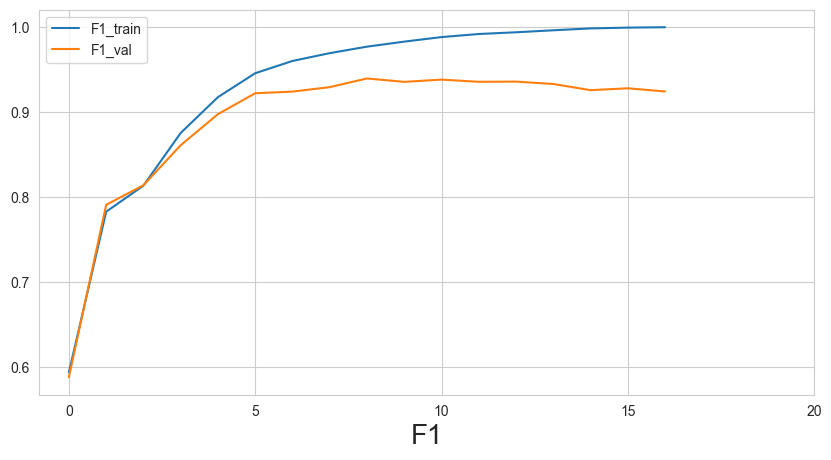

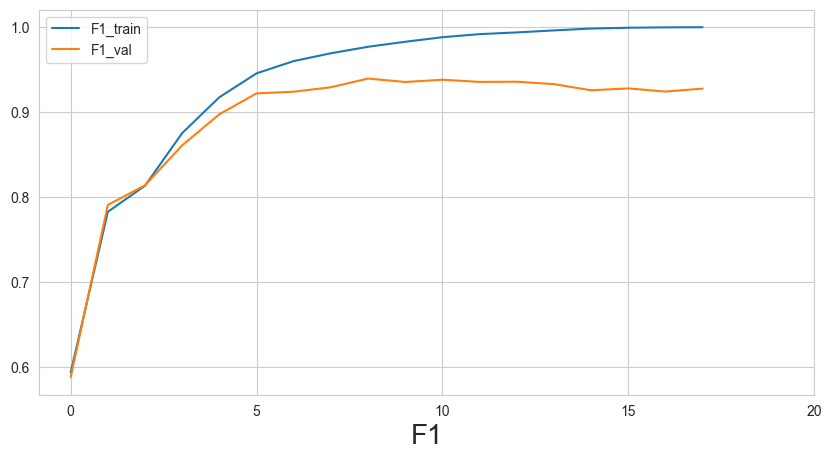

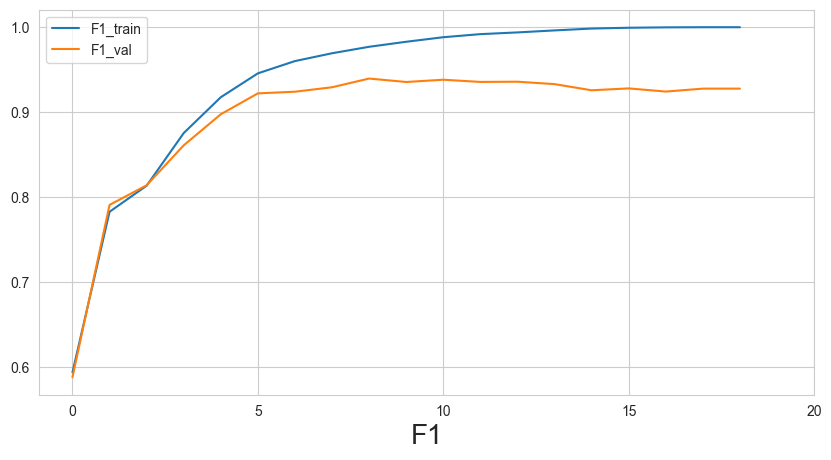

In [29]:
#intento con todas las variables

F1_train_hist_tree=[]
F1_val_hist_tree=[]

for depth in range(1,20):

    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train_tree, y_train_tree)
    
    y_train_pred_tree = tree.predict(X_train_tree)
    y_val_pred_tree = tree.predict(X_test_tree)
    
    F1_train_tree = f1_score(y_train_tree, y_train_pred_tree)
    F1_val_tree = f1_score(y_test_tree, y_val_pred_tree)
    
    F1_train_hist_tree.append(F1_train_tree)
    F1_val_hist_tree.append(F1_val_tree)
    
    plt.figure(figsize=(10,5))
    sns.set_style("whitegrid")
    plt.plot(F1_train_hist_tree, label ="F1_train")
    plt.plot(F1_val_hist_tree, label ="F1_val")
    plt.legend(loc="upper left")
    plt.xticks(range(0,21,5))
    plt.xlabel("max_depth",size=20)
    plt.xlabel("F1",size=20)
    plt.show()

In [82]:
#usamos 5 de profundidad para tener una buena estimación pero poco overffiting
tree_df = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_df.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(max_depth=5, random_state=42)

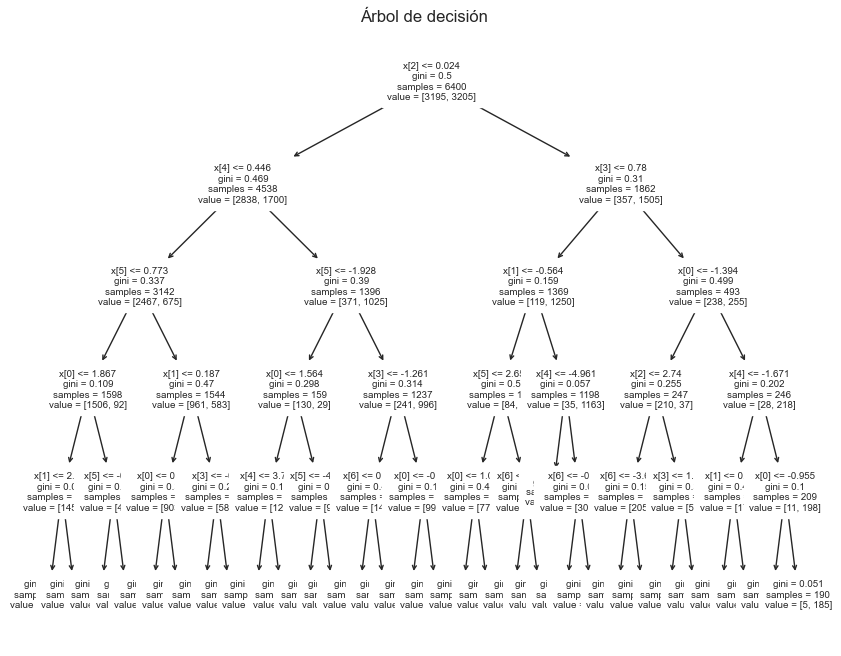

In [39]:
plt.figure(figsize=(10, 8))
plot_tree(tree_df, fontsize=7)
plt.title(f"Árbol de decisión")
plt.show()

In [83]:
    y_train_pred_tree_df = tree_df.predict(X_train_tree)
    y_val_pred_tree_df = tree_df.predict(X_test_tree)
    
    print('F1_train_tree', f1_score(y_train_tree, y_train_pred_tree_df))
    print('F1_val_tree', f1_score(y_test_tree, y_val_pred_tree_df))

F1_train_tree 0.9176581089542892
F1_val_tree 0.8976279650436954


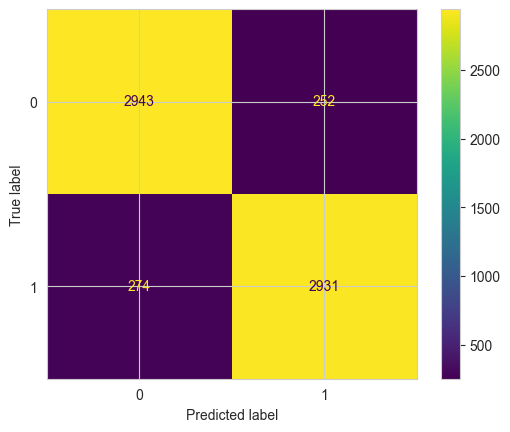

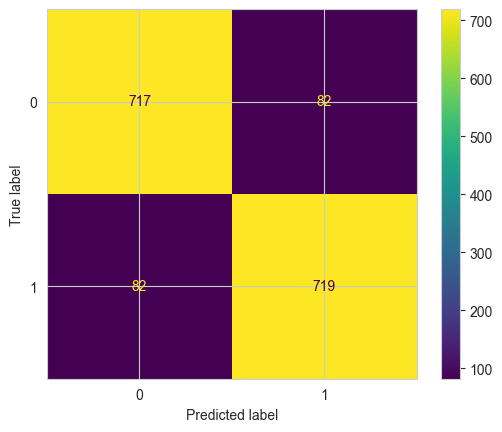

In [84]:
cm_train_tree=confusion_matrix(y_train_tree,y_train_pred_tree_df)
cm_val_tree=confusion_matrix(y_test_tree,y_val_pred_tree_df)
cm_plot_train_tree=ConfusionMatrixDisplay(cm_train_tree)
cm_plot_val_tree=ConfusionMatrixDisplay(cm_val_tree)
cm_plot_train_tree.plot()
cm_plot_val_tree.plot()
plt.show()

In [88]:
probs_dt = tree_df.predict_proba(X_test_tree)[:, 1]

<h3>Random forest</h3>

In [43]:
param_distribs = {
       
        'max_depth': randint(low=3, high=7),
    }

rnd_clf = RandomForestClassifier(n_jobs=-1)

rnd_search = RandomizedSearchCV(rnd_clf, param_distributions=param_distribs,
                                n_iter=5, cv=5, scoring='f1_weighted')

rnd_search.fit(X_train_rf, y_train_rf)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021A34EC8A10>},
                   scoring='f1_weighted')

In [44]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("F1 score:", mean_score, "-", "Parámetros:", params)

F1 score: 0.9512434539903039 - Parámetros: {'max_depth': 6}
F1 score: 0.943896844725729 - Parámetros: {'max_depth': 5}
F1 score: 0.924208748954416 - Parámetros: {'max_depth': 4}
F1 score: 0.941087913574718 - Parámetros: {'max_depth': 5}
F1 score: 0.9292121146972259 - Parámetros: {'max_depth': 4}


In [45]:
rnd_search.best_params_

{'max_depth': 6}

In [46]:
rnd_search.best_estimator_

RandomForestClassifier(max_depth=6, n_jobs=-1)

In [47]:
# Seleccionamos el mejor modelo
clf_rnd = rnd_search.best_estimator_

In [48]:
# Predecimos con el conjunto de datos de entrenamiento
y_train_pred_rf = clf_rnd.predict(X_train_rf)
# Predecimos con el conjunto de datos de entrenamiento
y_val_pred_rf = clf_rnd.predict(X_test_rf)

In [50]:
# Predicción con el conjunto de datos de entrenamiento
print("F1 score Train Set:", f1_score(y_train_pred_rf, y_train_rf, average='weighted'))
# Predicción con el conjunto de datos de validación
print("F1 score Validation Set:", f1_score(y_val_pred_rf, y_test_rf, average='weighted'))

F1 score Train Set: 0.9650031584449433
F1 score Validation Set: 0.943750527347046


In [51]:
feature_importances = {name: score for name, score in zip(list(df), clf_rnd.feature_importances_)}

In [52]:
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(5)

Weight         0.194513
Size           0.161545
Sweetness      0.161326
HarvestTime    0.156920
Ripeness       0.139466
dtype: float64

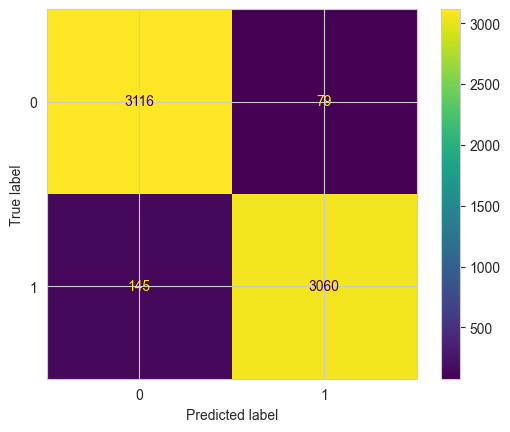

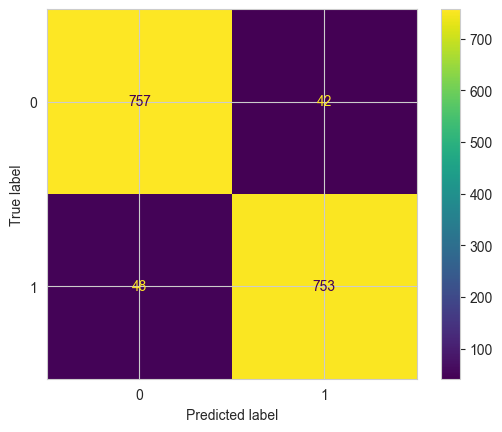

In [53]:
cm_train_rf=confusion_matrix(y_train_rf,y_train_pred_rf)
cm_val_rf=confusion_matrix(y_test_rf,y_val_pred_rf)
cm_plot_train_rf=ConfusionMatrixDisplay(cm_train_rf)
cm_plot_val_rf=ConfusionMatrixDisplay(cm_val_rf)
cm_plot_train_rf.plot()
cm_plot_val_rf.plot()
plt.show()

In [73]:
probs_rf = clf_rnd.predict_proba(X_test_rf)[:, 1]

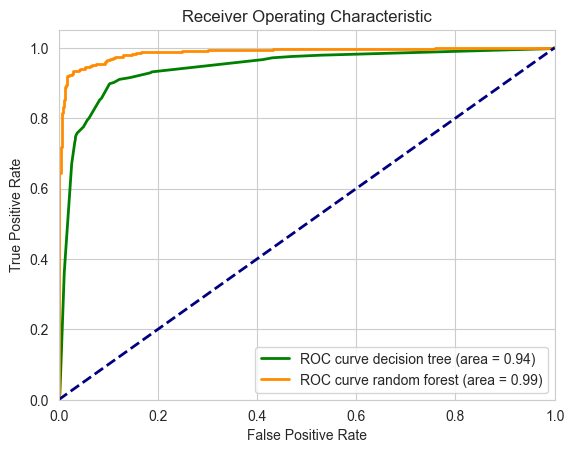

In [89]:
from sklearn.metrics import roc_curve, auc
# Calcular la curva ROC
fpr_rf, tpr_rf,_ = roc_curve(y_test_rf,probs_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test_tree,probs_dt)

roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='ROC curve decision tree (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve random forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()